In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [5]:
x

array([0.35237491, 4.8951233 , 1.86662437, 3.50706129, 3.38087384,
       0.73093728, 3.88562366, 5.65224803, 6.28318531, 2.37137419,
       0.60474982, 3.63324875, 0.85712473, 2.49756165, 1.61424946,
       5.39987312, 6.15699785, 6.0308104 , 0.47856237, 2.87612401,
       4.51656093, 0.98331219, 1.10949964, 0.1       , 2.11899928,
       1.36187455, 4.01181111, 5.77843549, 4.26418602, 1.2356871 ,
       2.24518674, 1.99281183, 1.48806201, 4.64274839, 4.39037348,
       3.00231147, 0.22618746, 5.27368567, 5.02131076, 5.52606058,
       2.6237491 , 4.76893584, 3.12849893, 1.74043692, 3.7594362 ,
       3.25468638, 5.90462294, 4.13799857, 2.74993656, 5.14749821])

In [6]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [7]:
k_indices = build_k_indices(y, 4, 1)

In [8]:
k_indices[0]

array([27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39])

In [9]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    y_test = y[k_indices]
    x_test = x[k_indices]
    
    y_train = [y[index] for index in range(len(y)) if index not in k_indices]
    x_train = [x[index] for index in range(len(y)) if index not in k_indices]
    
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    tx_train = build_poly(x_train, degree)
    
    tx_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w, loss_tr = ridge_regression(y_train, tx_train, lambda_)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    
    loss_te = 1./(2*len(y)) * np.sum((y_test - tx_test@w)**2) + lambda_ * np.linalg.norm(w)**2
    
    return loss_tr, loss_te

The VARIANCE of the TRAINING RMSE IS 0.0010277128674844797
The VARIANCE of the TEST RMSE IS 0.0009938231022565268


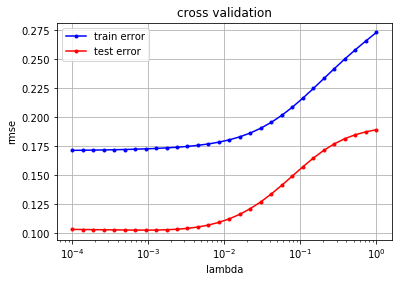

In [13]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_  in lambdas:
        rloss_tr = []
        rloss_te = []
        for k in range(k_fold):
            l_tr, l_te = cross_validation(y, x, k_indices[k], k_fold, lambda_, degree)
            rloss_tr.append(np.sqrt(l_tr))
            rloss_te.append(np.sqrt(l_te))
        
        rmse_tr.append(np.mean(rloss_tr))
        rmse_te.append(np.mean(rloss_te))
    
    print("The VARIANCE of the TRAINING RMSE IS {}".format(np.var(rmse_tr)))
    print("The VARIANCE of the TEST RMSE IS {}".format(np.var(rmse_te)))
    
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

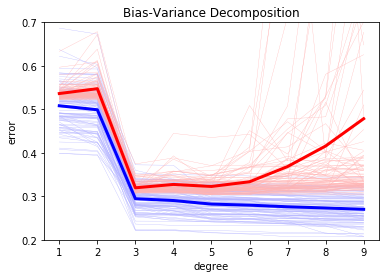

In [22]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        X_train, y_train, X_test, y_test = split_data(x, y, ratio_train, seed=seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_deg, deg in enumerate(degrees):
            feat_mat = build_poly(X_train, deg)
            mse_tr, weights = least_squares(y_train, feat_mat)
            rmse_tr[index_seed, index_deg] = np.sqrt(2*mse_tr)
        
            mse_te = 1./(2*len(y_test)) * np.sum((y_test - build_poly(X_test,deg) @ weights)**2)
            rmse_te[index_seed, index_deg] = np.sqrt(2*mse_te)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()